In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving movies.csv to movies.csv
User uploaded file "movies.csv" with length 494431 bytes


In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ratings.csv to ratings.csv
User uploaded file "ratings.csv" with length 2342847 bytes


In [ ]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies=pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
unique_user=ratings.userId.nunique(dropna=True)
unique_movie=ratings.movieId.nunique(dropna=True)
print("number of unique users:")
print(unique_user)
print("number of unique movies:")
print(unique_movie)

number of unique users:
610
number of unique movies:
9724


for creating item user matrix,
check how many ratings are present

In [ ]:
total_ratings=unique_user*unique_movie
#gives number of rows
rating_present=ratings.shape[0]
ratings_not_provided=total_ratings-rating_present
print("Some users have not watched some movies and it is given by")
print(ratings_not_provided)
print("sparsity of user-item matrix is:")
print(ratings_not_provided/total_ratings)

Some users have not watched some movies and it is given by
5830804
sparsity of user-item matrix is:
0.9830003169443864


In [ ]:
rating_cnt=pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
rating_cnt
#this rating cnt doesn't contain count of rating, append rating_cnt
rating_cnt=rating_cnt.append(pd.DataFrame({'count':ratings_not_provided},  index=[0])).sort_index()
rating_cnt
#since the count of rating 0 is too large in comparison to others rating
rating_cnt['log_count']=np.log(rating_cnt['count'])
rating_cnt

,count,log_count
0.0,5830804,15.578665
0.5,1370,7.222566
1.0,2811,7.941296
1.5,1791,7.490529
2.0,7551,8.929435
2.5,5550,8.621553
3.0,20047,9.905835
3.5,13136,9.483112
4.0,26818,10.196829
4.5,8551,9.053804


frequency of rating like 3 and 4 are more in compare to other ratings


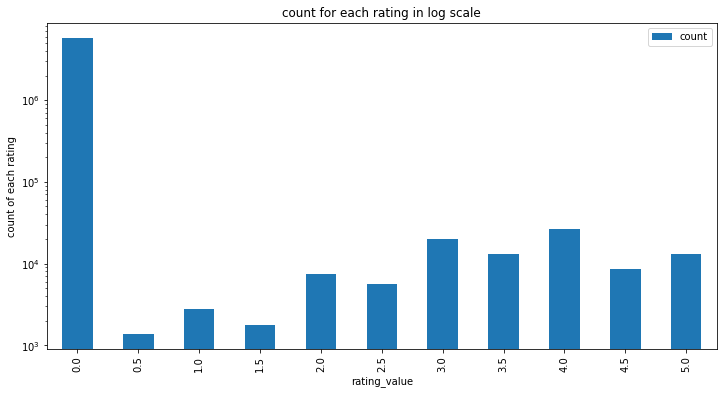

In [ ]:
#bar plot to visualise the ratings
rating_cnt_for_vis = rating_cnt
ax = rating_cnt_for_vis.reset_index().rename(columns = {'index':'rating_value'}).plot(
    x='rating_value',
    y='count',
    logy = True,
    kind='bar',
    title='count for each rating in log scale',
    figsize=(12,6)
)
ax.set_xlabel('rating_value')
ax.set_ylabel('count of each rating')
print("frequency of rating like 3 and 4 are more in compare to other ratings")

In [ ]:
# 2) plot rating frequency of each movie(how many time a movie has been rated)

movie_freq = pd.DataFrame(ratings.groupby('movieId').size(),columns=['count'])
movie_freq.head()

,count
movieId,
1,215
2,110
3,52
4,7
5,49


Text(0, 0.5, 'rating freq of movies')

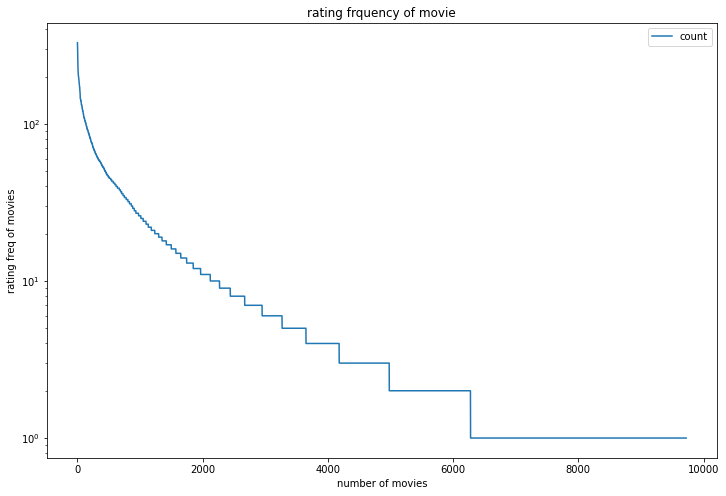

In [ ]:
# plot movie rating freq
movie_freq_copy = movie_freq.sort_values(by='count',ascending=False)
movie_freq_copy=movie_freq_copy.reset_index(drop=True)

ax1  = movie_freq_copy.plot(
    title='rating frquency of movie',
    logy=True,
    figsize=(12,8)
)
ax1.set_xlabel('number of movies')
ax1.set_ylabel('rating freq of movies')

In [ ]:
threshold_rating_freq = 10
# first take out the movie id  for which movie is rated more than threshold value than keep only this movies in our original ratings dataframe
# movie_freq.query('count>= @threshold_rating_freq').shape = (13360,1)
# our original movie_freq has shape of (9724 ,1) and now its reduce to (2269,1)
popular_movies_id = list(set(movie_freq.query('count>=@threshold_rating_freq').index))

# ratings df after dropping non popular movies
ratings_with_popular_movies = ratings[ratings.movieId.isin(popular_movies_id)]

print('shape of ratings:')
print(ratings.shape)

print('shape of ratings_with_popular_movies:')
print(ratings_with_popular_movies.shape)

print("no of movies which are rated more than 50 times:")
print(len(popular_movies_id))


print("no of unique movies present in dataset:")
print(unique_movie)

shape of ratings:
(100836, 4)
shape of ratings_with_popular_movies:
(81116, 4)
no of movies which are rated more than 50 times:
2269
no of unique movies present in dataset:
9724


In [ ]:
user_cnt = pd.DataFrame(ratings.groupby('userId').size(),columns=['count'])
user_cnt_copy = user_cnt
user_cnt.head()

,count
userId,
1,232
2,29
3,39
4,216
5,44


Text(0, 0.5, 'rating frequency')

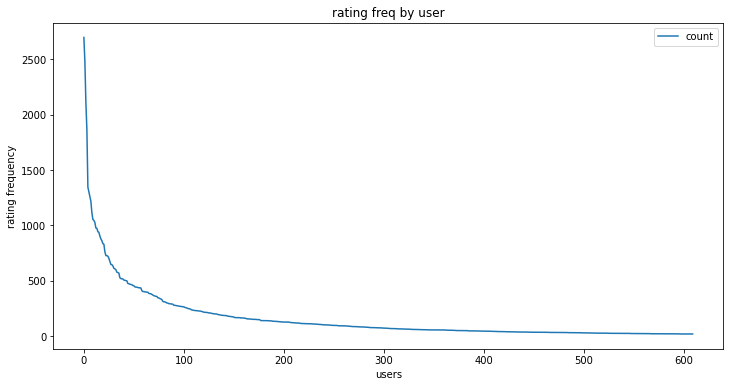

In [ ]:
# plot rating freq
ax  = user_cnt_copy.sort_values('count',ascending=False).reset_index(drop=True).plot(
      title='rating freq by user',
      figsize=(12,6),

)
ax.set_xlabel("users")
ax.set_ylabel("rating frequency")

In [ ]:

threshold_val = 30
active_user = list(set(user_cnt.query('count>=@threshold_val').index))

#upadte your ratings_with_popular_movies
ratings_with_popular_movies_with_active_user = ratings_with_popular_movies[ratings_with_popular_movies.userId.isin(active_user)]

print('shape of ratings_with_popular_movies:')
print(ratings_with_popular_movies.shape)

print('shape of ratings_with_popular_movies_with_active_user:')
print(ratings_with_popular_movies_with_active_user.shape)

print("unique_user:")
print(unique_user)

print("active_user")
print(len(active_user))

print("unique_movies")
print(unique_movie)

print("popular_movies")
print(len(popular_movies_id))

shape of ratings_with_popular_movies:
(81116, 4)
shape of ratings_with_popular_movies_with_active_user:
(78712, 4)
unique_user:
610
active_user
501
unique_movies
9724
popular_movies
2269


In [ ]:
print("sparsity of final ratings df:")
print( (428*2269 - 76395)/(428*2269) )

sparsity of final ratings df:
0.9213340719902134


In [ ]:
final_ratings = ratings_with_popular_movies_with_active_user
#final_ratings.shape
item_user_mat = final_ratings.pivot(index='movieId',columns = 'userId',values='rating').fillna(0)

In [ ]:
# create a mapper which maps movie index and its title
movie_to_index = {
    movie:i for i,movie in enumerate(list(movies.set_index('movieId').loc[item_user_mat.index].title))
}
#(movie_to_index)

In [ ]:
# create a sparse matrix for more efficient calculations
from scipy.sparse import csr_matrix
item_user_mat_sparse = csr_matrix(item_user_mat.values)

In [ ]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# fuzzy_movie_name_matching
from fuzzywuzzy import fuzz

def fuzzy_movie_name_matching (input_str,mapper,print_matches):
    # match_movie is list of tuple of 3 values(movie_name,index,fuzz_ratio)
    match_movie = []
    for movie,ind in mapper.items():
        current_ratio = fuzz.ratio(movie.lower(),input_str.lower())
        if(current_ratio>=50):
            match_movie.append((movie,ind,current_ratio))

    # sort the match_movie with respect to ratio

    match_movie = sorted(match_movie,key =lambda x:x[2])[::-1]

    if len(match_movie)==0:
        print("Oops..! no such movie is present here\n")
        return -1
    if print_matches == True:
        print("some matching of input_str are\n")
        for title,ind,ratio in match_movie:
            print(title,ind,'\n')


    return match_movie[0][1]

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# define the model
from sklearn.neighbors import NearestNeighbors
recommendation_model = NearestNeighbors(metric='cosine',algorithm = 'brute',n_neighbors=20,n_jobs=-1)

In [ ]:
# create a function which takes a movie name and make recommedation for it
def make_recommendation(input_str,data,model,mapper,n_recommendation):
    print("system is working....\n")
    model.fit(data)

    index = fuzzy_movie_name_matching (input_str,mapper,print_matches = False)

    if index==-1 :
        print("pls enter a valid movie name\n")
        return

    index_list = model.kneighbors(data[index],n_neighbors=n_recommendation+1,return_distance=False)
    # now we ind of all recommendation
    # build mapper index->title
    index_to_movie={
        ind:movie for movie,ind in mapper.items()
    }

    print("Viewer who watches this movie ",input_str,"also watches following movies.")
    #print(index_list[0][2])
    for i in range(1,index_list.shape[1]):
        print(index_to_movie[index_list[0][i]])
    return

In [ ]:
make_recommendation('Father of the Bride Part II ',item_user_mat_sparse,recommendation_model,movie_to_index,10)

system is working....

Viewer who watches this movie  Father of the Bride Part II  also watches following movies.
Sabrina (1995)
Miracle on 34th Street (1994)
Striptease (1996)
Juror, The (1996)
Mr. Holland's Opus (1995)
Sgt. Bilko (1996)
Twister (1996)
Grumpier Old Men (1995)
Tin Cup (1996)
Willy Wonka & the Chocolate Factory (1971)


In [ ]:
make_recommendation('Jurassic Park',item_user_mat_sparse,recommendation_model,movie_to_index,10)

system is working....

Viewer who watches this movie  Jurassic Park also watches following movies.
Terminator 2: Judgment Day (1991)
Forrest Gump (1994)
Braveheart (1995)
Independence Day (a.k.a. ID4) (1996)
Fugitive, The (1993)
Speed (1994)
Batman (1989)
True Lies (1994)
Apollo 13 (1995)
Lion King, The (1994)
